In [1]:

import pandas as pd

file_path = "all_seasons.csv"
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
# Check for missing/null values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)


Missing Values per Column:
 Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64


In [5]:
df.describe()


,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [7]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns


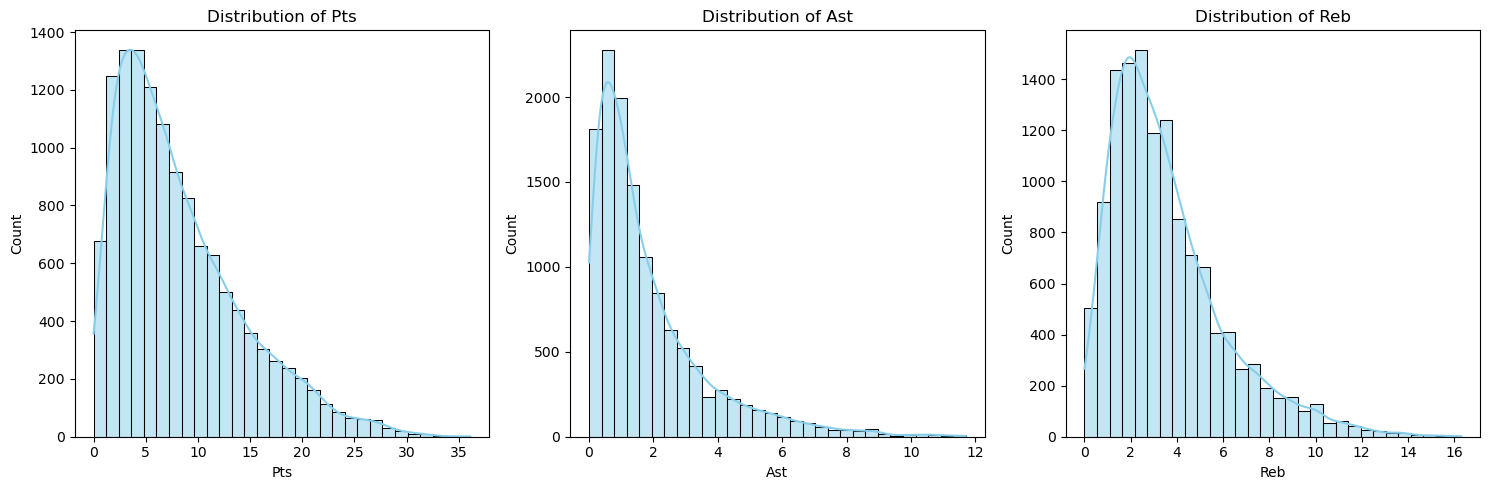

In [9]:
# Distribution of Player Performance Metrics
metrics = ['pts', 'ast', 'reb']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[metric], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {metric.title()}')
    plt.xlabel(metric.title())
plt.tight_layout()
plt.show()


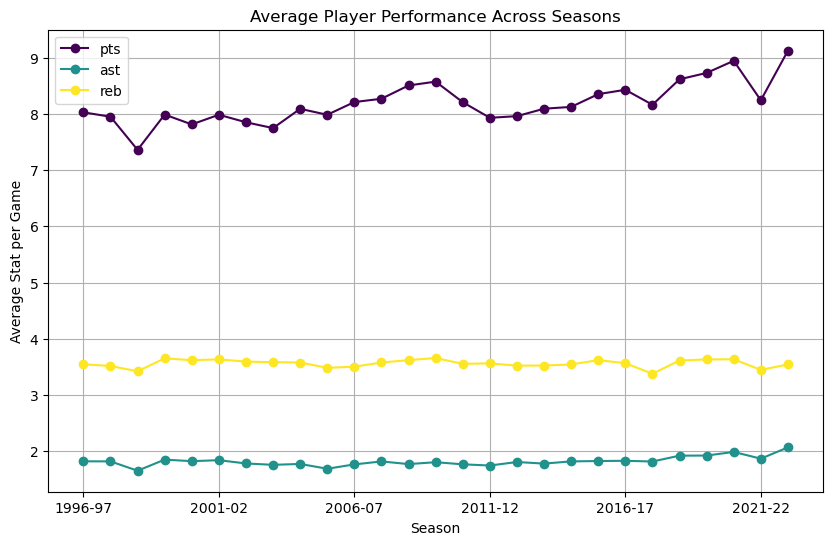

In [13]:
# Analyze Player Performance Over Seasons
season_stats = df.groupby('season')[['pts', 'ast', 'reb']].mean()

# Plot Trend Across Seasons
season_stats.plot(kind='line', figsize=(10, 6), marker='o', colormap='viridis')
plt.title('Average Player Performance Across Seasons')
plt.ylabel('Average Stat per Game')
plt.xlabel('Season')
plt.grid(True)
plt.show()



C:\Users\sheik\AppData\Local\Temp\ipykernel_18264\4018553307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.values, y=top_players.index, palette='magma')


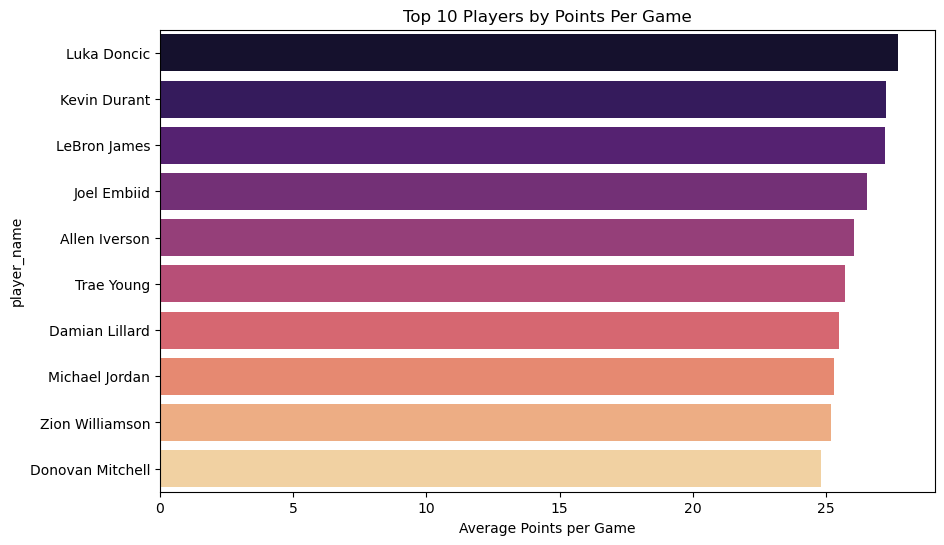

In [15]:
# Top 10 Players by Points Per Game
top_players = df.groupby('player_name')['pts'].mean().sort_values(ascending=False).head(10)

# Plot Top Players
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players.values, y=top_players.index, palette='magma')
plt.title('Top 10 Players by Points Per Game')
plt.xlabel('Average Points per Game')
plt.show()


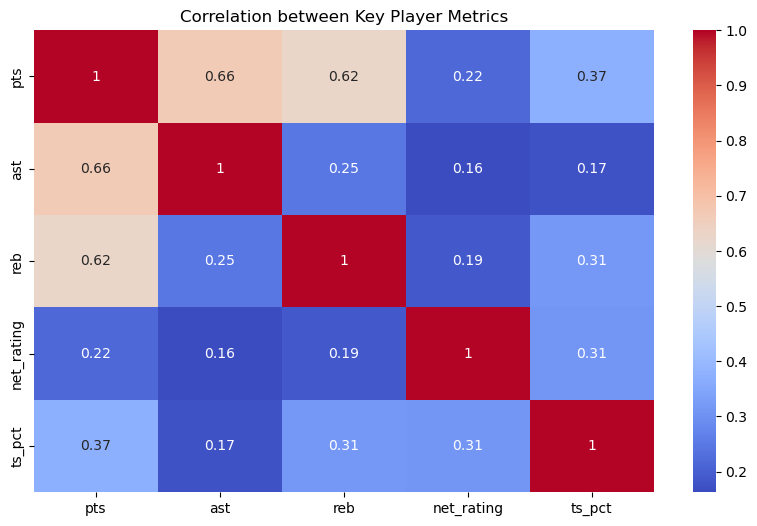

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['pts', 'ast', 'reb', 'net_rating', 'ts_pct']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Key Player Metrics')
plt.show()
